#Project for time series study using prophet
---

**STEPS:**

---
 [x] Data collection through yahoo finance;

 [x] Series Plot;

 [x] Autocorrelation evaluation of the series;

 [x] Evaluation of additive or multiplicative modeling;

 [ ] Analyze using a frequency of weeks;

 [ ] Analyze using a frequency of months;

 [ ] Make the forecast for the first half of 2021;

 [ ] Studying algorithm tuning methods;

---

**OBJECTIVES:**

---
 [ ] Collect the data from the exchange;

 [ ] Data Analysis;

 [ ] Creat a model;

 [ ] Learning more about PROPHET;

 [ ] Predict the first half of 2021;

 ---


#### Loading the main libraries and the time series
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas_datareader 
import pandas_datareader.data as web
!pip install yfinance #--upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 5.5MB 6.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=02506cf3b40b94acc98bbe2d7e238fbc5296d6604063ea62df286d811a1f9fee
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Instantiating the library to acquire data
yf.pdr_override()

In [ ]:
# Loading the database with BOVESPA values, within a specific range
from datetime import date
ticker='^BVSP'
data_start='2010-01-01'
print('First Day')
print(data_start)
data_end=date.today().strftime('%Y-%m-%d') 
print('Last Day')
print(data_end)
ibov = web.get_data_yahoo(ticker, start=data_start, end=data_end)

First Day
2010-01-01
Last Day
2021-01-28
[*********************100%***********************]  1 of 1 completed


#### Time series analysis
---

In [ ]:
# Analysing the first 5 lines from the dataset
ibov.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400


In [ ]:
# Analysing the last 5 lines from the dataset
ibov.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-13,123996.0,124032.0,121016.0,122040.0,122040.0,10291500
2021-01-14,121947.0,123896.0,121947.0,123481.0,123481.0,8974400
2021-01-15,123472.0,123472.0,120374.0,120502.0,120502.0,9387600
2021-01-18,120351.0,122586.0,120351.0,121242.0,121242.0,7223100
2021-01-19,121250.0,122120.0,119257.0,120673.0,120673.0,7886000
2021-01-20,120645.0,121449.0,118740.0,119708.0,119708.0,7947300
2021-01-21,119628.0,120243.0,117785.0,118443.0,118443.0,8573900
2021-01-22,118318.0,118318.0,116109.0,117172.0,117172.0,9373100
2021-01-26,117381.0,119167.0,116109.0,116464.0,116464.0,10681400


In [ ]:
# Analysing the type of data from the dataset, and looking for null values
ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2733 entries, 2010-01-04 to 2021-01-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2733 non-null   float64
 1   High       2733 non-null   float64
 2   Low        2733 non-null   float64
 3   Close      2733 non-null   float64
 4   Adj Close  2733 non-null   float64
 5   Volume     2733 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 149.5 KB


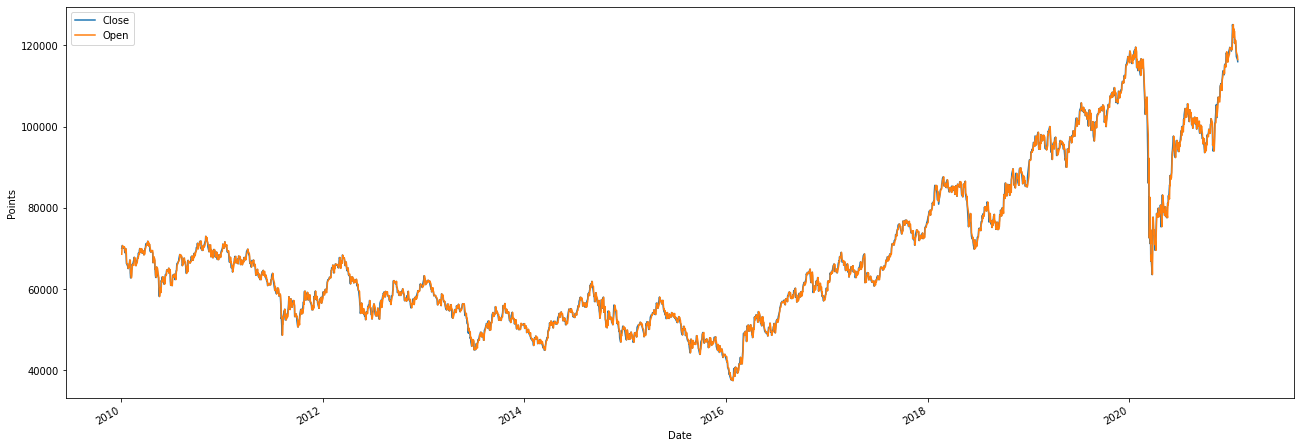

In [ ]:
#Ploting the values of Opening and Closing the BOVESPA
ibov[["Close","Open"]].plot(figsize=(22,8),xlabel='Date',ylabel='Points');

As at first we are interested in doing a simple analysis to predict the opening or closing value of the exchange with the prophet, I will remove the data for High, Low, Adj and Volume.

---



In [ ]:
ibov_fillter=ibov[["Close","Open"]]

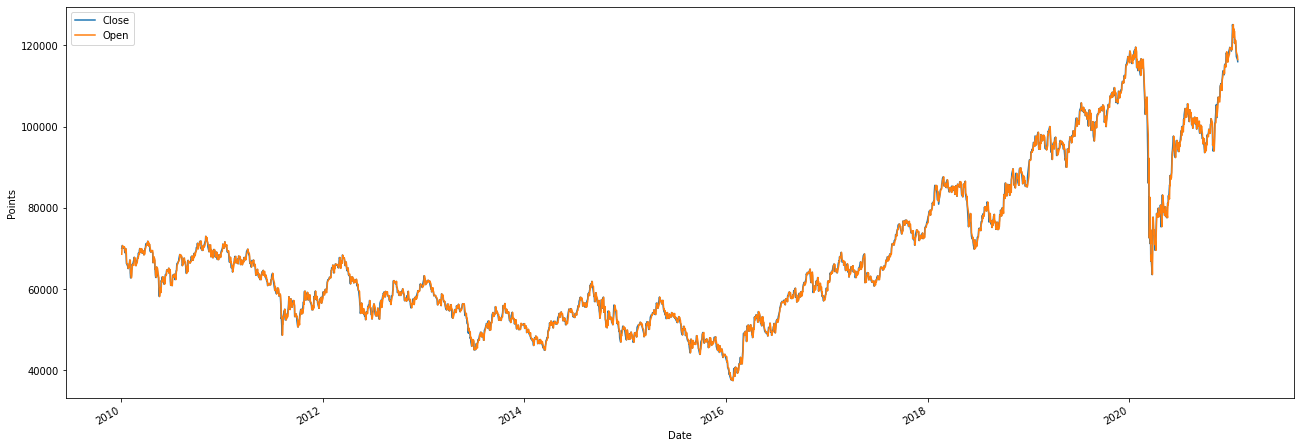

In [ ]:
#Ploting the values of Opening and Closing the BOVESPA, from the filltred dataset
ibov_fillter.plot(figsize=(22,8),xlabel='Date',ylabel='Points');

#### Evaluating the autocorrelation
---


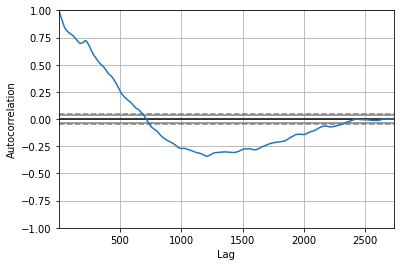

In [ ]:
# Loading the librarie
from pandas.plotting import autocorrelation_plot

#Looking the Closing Data
autocorrelation_plot(ibov_fillter['Close'])

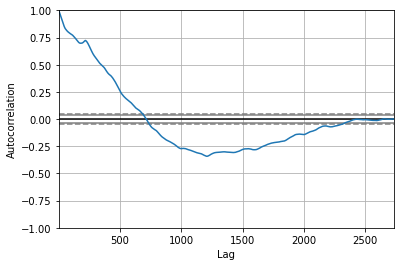

In [ ]:
#Looking the Opening Data
autocorrelation_plot(ibov_fillter['Open'])

The correletion plots, graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

The horizontal lines in the plot correspond to 95% and 99% confidence bands.

The dashed line is 99% confidence band.

**Important**

As we can see, both datas has a higher correlation. And just for this inicial studie, I will **consider just the Opening Data** .

In [ ]:
#### Autocorrelation with  the StatsModel
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We have two types of plot, that is heavily used to analyse the correlation in time series: 

**Autocorrelation (acf)** and **Partial Autocorrelation (pacf)** plots

**Autocorrelation (acf)**

Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

*For exemple the positive values of correlation, means that if the points increase it still increasing*.


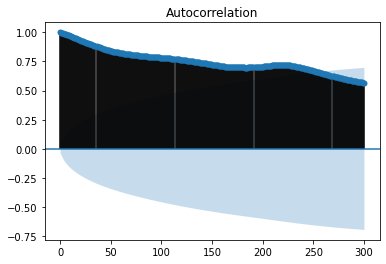

In [ ]:
# Autocorrelation plot
plot_acf(ibov_fillter['Open'], lags=300)
pyplot.show()

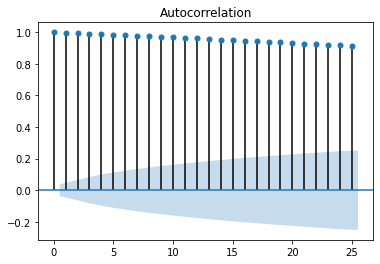

In [ ]:
# Zooming to better analyze the correlation
plot_acf(ibov_fillter['Open'], lags=25)
pyplot.show()

**Partial Autocorrelation (pacf)**

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

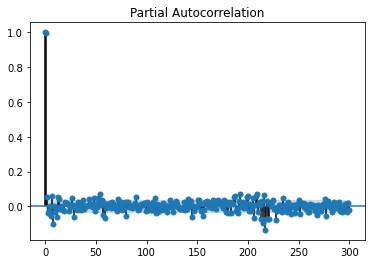

In [ ]:
# Partial Autocorrelation plot
plot_pacf(ibov_fillter['Open'], lags=300)
pyplot.show()

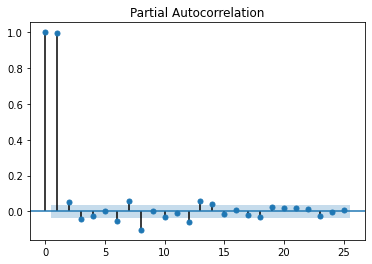

In [ ]:
plot_pacf(ibov_fillter['Open'], lags=25)
pyplot.show()

More Explanations cen be found into:

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

https://www.dummies.com/programming/big-data/data-science/autocorrelation-plots-graphical-technique-for-statistical-data/



#### Making a week avaliation
---


In [ ]:
# Making a resample for a week analysis
resample = ibov_fillter.resample('1W')

In [ ]:
type(resample)

pandas.core.resample.DatetimeIndexResampler

In [ ]:
points_mean_week = resample.mean()

In [ ]:
# Evaluating the null values
points_mean_week.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 578 entries, 2010-01-10 to 2021-01-31
Freq: W-SUN
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   578 non-null    float64
 1   Open    578 non-null    float64
dtypes: float64(2)
memory usage: 13.5 KB


In [ ]:
# Obserrving the last 5 terms of the dataset, weekly resemple.
points_mean_week.tail(5)

,Close,Open
Date,,
2021-01-03,119277.333333,118782.0
2021-01-10,120933.000000,119745.2
2021-01-17,122565.600000,123549.0
2021-01-24,119447.600000,120038.4
2021-01-31,116209.000000,116922.0


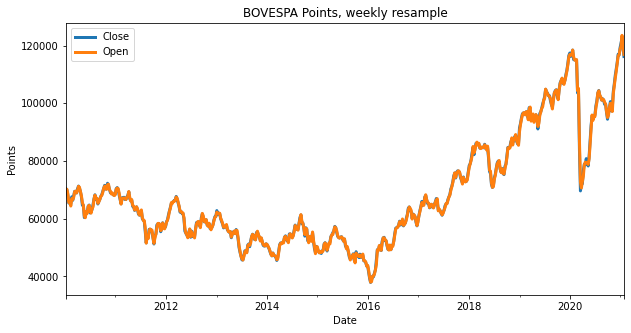

In [ ]:
# Plot of the weekly resemple dataset.
points_mean_week.plot(figsize=(10,5), linewidth=3, fontsize=10, title='BOVESPA Points, weekly resample',ylabel='Points')
pyplot.show()

## Creating a baseline considering a forecast with a moving average.

---

In [ ]:
# Defines a n-element window
n=7
window = n
# Obtains the first n values of the series
history_open = [points_mean_week['Open'].values[i] for i in range(window)]
history_open

[70009.6, 70186.8, 68548.8, 65600.5, 66037.6, 64364.8, 66986.33333333333]

In [ ]:
# Obtains all values after the first n values.
# range(Window_size, series_size)
test_open = [points_mean_week['Open'].values[i] for i in range(window, len(points_mean_week['Open'].values))]
# Displaying the first 5 values after the window
test_open[0:5]

[66554.0, 67397.0, 69376.8, 69547.0, 68920.6]

In [ ]:
# Printing the first 10 elements of the series to check the previous codes
points_mean_week['Open'].head(10)

Date
2010-01-10    70009.600000
2010-01-17    70186.800000
2010-01-24    68548.800000
2010-01-31    65600.500000
2010-02-07    66037.600000
2010-02-14    64364.800000
2010-02-21    66986.333333
2010-02-28    66554.000000
2010-03-07    67397.000000
2010-03-14    69376.800000
Freq: W-SUN, Name: Open, dtype: float64

---

Forecast with Mobile Windows

---

In [ ]:
chute=[history[i] for i in range(length - window, length)]
chute

[118782.0, 119745.2, 123549.0, 120038.4]

In [ ]:
###############################################################################
# Defines a variable called X_open that is the copy of the data series
###############################################################################
X_open = points_mean_week['Open'].values

###############################################################################
# Defines a n-element window
###############################################################################
n=12
window = n
###############################################################################
# Obtains the first n values of the series
###############################################################################
history = [X_open[i] for i in range(window)]

###############################################################################
# Get all values after the first n (window).
###############################################################################
test = [X_open[i] for i in range(window, len(X_open))]

###############################################################################
# Creating a prediction list (precistion_MoveAverageWindows)
###############################################################################
prediction_MAW = []

###############################################################################
# Looping nos dados
###############################################################################
for t in range(len(test)):

  # Defining the length of the series in analysis
  length = len(history)
  
  # Defining the variable predicted_value_mean as the mean of the n current values.
    #range(start, stop, step)                                                        
  predicted_value_mean = np.mean([history[i] for i in range(length - window, length)])        
  
  # Defines the variable real_value with the current value of the test..
  real_value = test[t]                                                              
  
  # Adding the value into the prediction list
  prediction_MAW.append(predicted_value_mean)                                                  
  
  # Update the history list with the next real value..
  history.append(real_value)                                                        
  
  # Print the predicted value and the real value
  print('Valor predito=%f, Valor real=%f' % (predicted_value_mean, real_value))

Valor predito=67794.152778, Valor real=69739.500000
Valor predito=67771.644444, Valor real=71221.200000
Valor predito=67857.844444, Valor real=70876.800000
Valor predito=68051.844444, Valor real=69305.000000
Valor predito=68360.552778, Valor real=67905.200000
Valor predito=68516.186111, Valor real=65568.000000
Valor predito=68616.452778, Valor real=64553.800000
Valor predito=68413.741667, Valor real=60998.800000
Valor predito=67950.808333, Valor real=60324.000000
Valor predito=67361.391667, Valor real=62439.750000
Valor predito=66783.304167, Valor real=61837.800000
Valor predito=66140.870833, Valor real=64175.200000
Valor predito=65745.420833, Valor real=64635.800000
Valor predito=65320.112500, Valor real=62636.800000
Valor predito=64604.745833, Valor real=61913.750000
Valor predito=63857.825000, Valor real=63419.200000
Valor predito=63367.341667, Valor real=64072.200000
Valor predito=63047.925000, Valor real=66637.600000
Valor predito=63137.058333, Valor real=68144.800000
Valor predit

In [ ]:
# Calculating the Root Mean Square error
from sklearn.metrics import mean_squared_error
rmse_MAW = np.sqrt(mean_squared_error(test, prediction_MAW))    

In [ ]:
# Print the value of the rmse
print('Root Mean Square: %.3f' % rmse_MAW)

Root Mean Square: 5484.086


In [ ]:
# Calculating the mean of all Open points
points_mean_all=points_mean_week['Open'].mean()
print(points_mean_all)

68265.72727797006


In [ ]:
# Evaluating the percentual erro between the mean of all and the RMSE
percentual_avaliation_MAW=(rmse_MAW/points_mean_all)*100


In [ ]:
print('Percentage error between the all point mean and the RMSE : %.3f' % percentual_avaliation_MAW)

Percentage error between the all point mean and the RMSE : 8.033


---

Plot of the real values and the predicted values by the Moving Average Window method.

---

In [ ]:
#############################################
# plot the real values and the predicted ones
#############################################
#pyplot.plot(test, label='Real Value') 
#pyplot.legend()
#pyplot.plot(prediction_MAW, color='red', label='Predicted Value')
#pyplot.legend()
#pyplot.xlabel('Data')
#pyplot.show()

In [ ]:
# Creating tha variable with the time used into the MAW analysis
time_analysis=[points_mean_week.index[i] for i in range(length - window+1)]
# Observing the first 5 responses
time_analysis[0:5]

[Timestamp('2010-01-10 00:00:00', freq='W-SUN'),
 Timestamp('2010-01-17 00:00:00', freq='W-SUN'),
 Timestamp('2010-01-24 00:00:00', freq='W-SUN'),
 Timestamp('2010-01-31 00:00:00', freq='W-SUN'),
 Timestamp('2010-02-07 00:00:00', freq='W-SUN')]

In [ ]:
# Creating a Data Frame with the real and the prediscted values
d={'TIME':time_analysis, 'MAW': prediction_MAW,'Real':test}
MAW_results=pd.DataFrame(data=d)
# Seting Time as index of the df
MAW_results=MAW_results.set_index('TIME')
# Observing the first 5 lines
MAW_results.head(5)

,MAW,Real
TIME,,
2010-01-10,67794.152778,69739.5
2010-01-17,67771.644444,71221.2
2010-01-24,67857.844444,70876.8
2010-01-31,68051.844444,69305.0
2010-02-07,68360.552778,67905.2


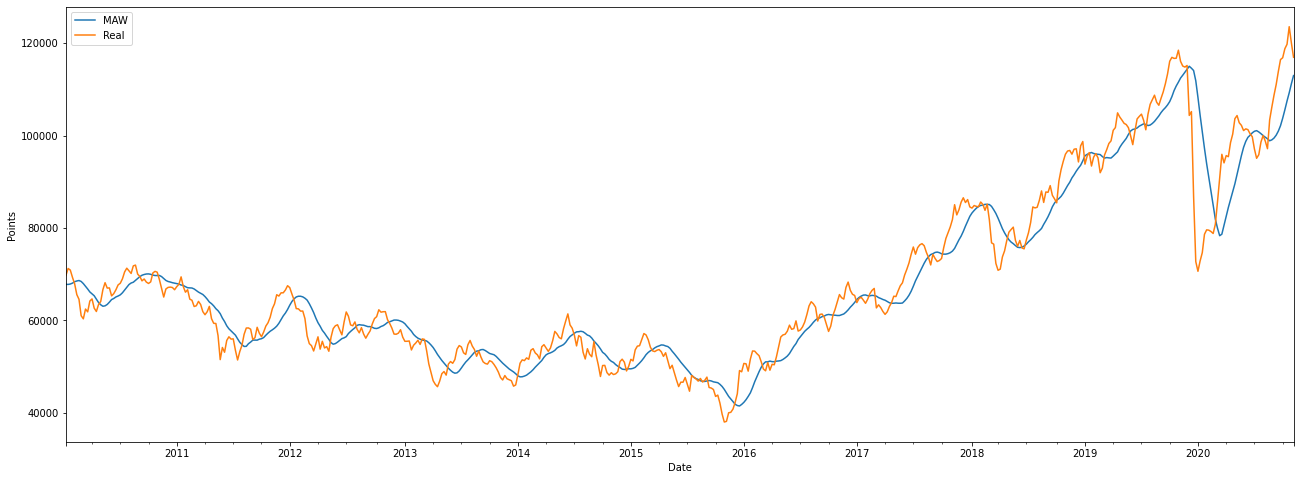

In [ ]:
############################################################
# Making the Plot to analysis the response of the MAW method
############################################################

MAW_results.plot(figsize=(22,8),xlabel='Date',ylabel='Points');

# Creating a new model with PROPHET, to try to get a better result than this one with MAW method.

---


Creating Data for making the validation of the model

In [ ]:
# Creating a Split point to separate data for future model validation
# 12=3 months (4 weeks per month)
# Trying to estimate the last three months of the dataset
split_point = len(points_mean_week['Open']) - 12

In [ ]:
# Dataset for prophet week analysis, with contains the lines until the split_point
dataset_prophet_1week = points_mean_week['Open'][0:split_point]
#len(dataset_prophet_1week)

566

In [ ]:
# Creating the data for the future validation of the model, it will contains the lest 12 values.
validation_prophet_1week =  points_mean_week['Open'][split_point:]

In [ ]:
# Print the size os the variables
print('Dataset %d, Validation %d' % (len(dataset_prophet_1week), len(validation_prophet_1week)))

Dataset 566, Validation 12


---

Now I will evaluate the trend, noise and the seasonality.This evaluation is the decomposition of the time series.

The decomposition is used to understand better the problem during time series analysis and forecasting.

It can be additive or multiplicative, let's use the statsmodels to making this avaliations.

The additive model is Y[t] = T[t] + S[t] + e[t]

The multiplicative model is Y[t] = T[t] * S[t] * e[t]


---

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Making the decomposition considering a additive model
result_addtive = seasonal_decompose(points_mean_week['Open'],  model='additive')

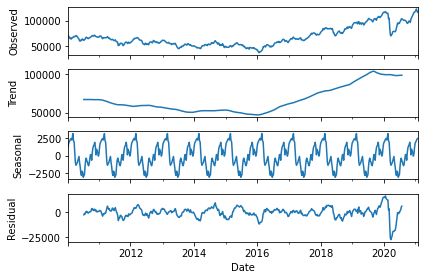

In [ ]:
import matplotlib.pyplot as plt
result_addtive.plot()
pyplot.show()

In [ ]:
# Making the decomposition considering a multiplicative model
resultado_mult = seasonal_decompose(points_mean_week['Open'],  model='multiplicative')

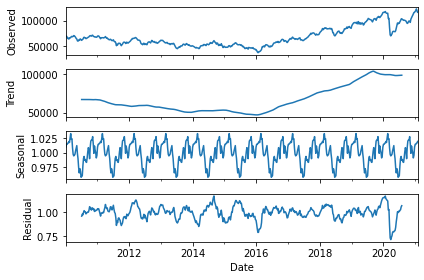

In [ ]:
import matplotlib.pyplot as plt
resultado_mult.plot()
pyplot.show()
# Observando o Residual o modelo multiplicativo ficou bem melhor que o aditivo

---

Observing the Residual in both models. I can assume that the multiplicative model better describe the time series, because it has the smallest residual error.

---

In [ ]:
#!pip install fbprophet


In [ ]:
from fbprophet import Prophet

In [ ]:
dataframe_1week = pd.DataFrame({'ds': dataset_1week.index, 'y': dataset_1week.values})

In [ ]:
dataframe_1week.tail()

,ds,y
1432,2020-10-11,95836.00
1433,2020-10-18,98591.75
1434,2020-10-25,99997.20
1435,2020-11-01,98764.40
1436,2020-11-08,97146.00


In [ ]:
#instanciando um modelo aditivo
model = Prophet(seasonality_mode='multiplicative')

In [ ]:
#treinando o modelo
model.fit(dataframe_1week)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Gerando dados futuros
# periods=12 periodos para frente
# Freq= Week, Year, Month
futuro_1week = model.make_future_dataframe(periods = 12, freq='W')

In [ ]:
futuro_1week.head()

,ds
0,1993-05-02
1,1993-05-09
2,1993-05-16
3,1993-05-23
4,1993-05-30


In [ ]:
futuro_1week.tail()

,ds
1444,2021-01-03
1445,2021-01-10
1446,2021-01-17
1447,2021-01-24
1448,2021-01-31


In [ ]:
# prevendo valores para dados futuros
saida_1week = model.predict(futuro_1week)

In [ ]:
# imprime saidas
saida_1week.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1993-05-02,397.478905,-6952.900624,7485.640415,397.478905,397.478905,-0.005852,-0.005852,-0.005852,-0.005852,-0.005852,-0.005852,0.0,0.0,0.0,395.152695
1,1993-05-09,434.169411,-6965.108444,7202.464836,434.169411,434.169411,-0.009078,-0.009078,-0.009078,-0.009078,-0.009078,-0.009078,0.0,0.0,0.0,430.228197
2,1993-05-16,470.859916,-6901.682899,7468.757515,470.859916,470.859916,-0.015164,-0.015164,-0.015164,-0.015164,-0.015164,-0.015164,0.0,0.0,0.0,463.719936
3,1993-05-23,507.550422,-6372.663874,8193.607984,507.550422,507.550422,-0.020970,-0.020970,-0.020970,-0.020970,-0.020970,-0.020970,0.0,0.0,0.0,496.907049
4,1993-05-30,544.240927,-6455.303922,7883.058431,544.240927,544.240927,-0.023457,-0.023457,-0.023457,-0.023457,-0.023457,-0.023457,0.0,0.0,0.0,531.474407


In [ ]:
saida_1week[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1442,2020-12-20,109040.025427,101928.050369,116129.027890
1443,2020-12-27,109685.740952,102776.758426,117181.529272
1444,2021-01-03,110937.461273,103530.213948,118152.039609
1445,2021-01-10,112359.080171,105425.732107,119900.784968
1446,2021-01-17,113247.144243,105962.877825,120693.795588
1447,2021-01-24,113302.540985,105944.870045,120421.698223
1448,2021-01-31,112965.365187,105140.515960,120319.625093


In [ ]:
# dataset de validação
validation_df_1week = pd.DataFrame({'ds': validation_1week.index})

In [ ]:
# prevendo dados
saida_prediction_1week = model.predict(validation_df_1week)

In [ ]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation_1week.values, saida_prediction_1week.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6074.334


In [ ]:
preço_medio_open_1week=dataframe_1week.mean()
print(preço_medio_open_1week)

y    39191.461091
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [ ]:
#quantos porcento do valor médio significa esse erro?
percentual_avaliation_1week=(rmse/preço_medio_open_1week)*100

In [ ]:
print('Quantos porcento do valor médio é esse erro : %.3f' % percentual_avaliation_1week)

Quantos porcento do valor médio é esse erro : 15.499


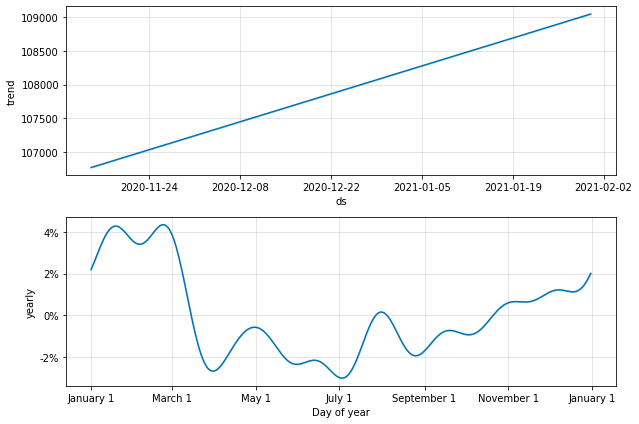

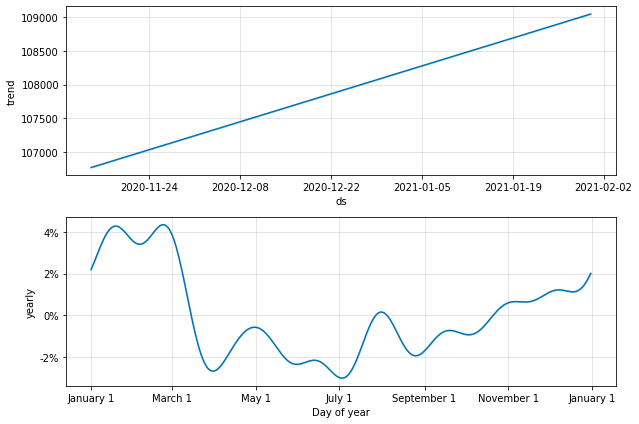

In [ ]:
model.plot_components(saida_prediction_1week)

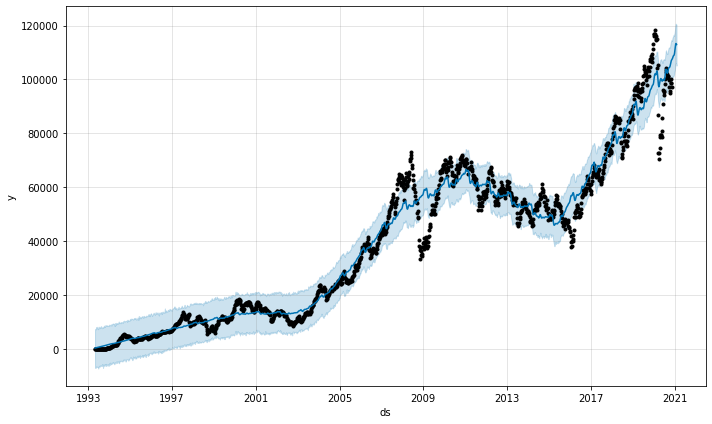

In [ ]:
# Python
figura = model.plot(saida_1week)

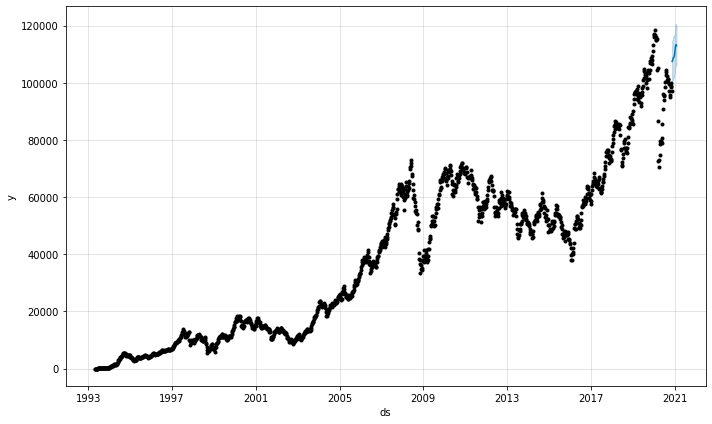

In [ ]:
# Python
figura = model.plot(saida_prediction_1week)

# Vou avaliar agora qual seria o resultado se tivesse utilizado os dados mensais e não semanalmente

In [ ]:
# Fazendo uma análise mesal
resample = ibov_fillter.resample('1M')


In [ ]:
preco_medias_1month = resample.mean()

In [ ]:
preco_medias_1month.head()

,Close,Open
Date,,
1993-04-30,24.150000,24.325000
1993-05-31,29.528572,29.019048
1993-06-30,46.233334,45.561905
1993-07-31,59.586363,59.136363
1993-08-31,78.890910,77.490909


In [ ]:
preco_medias_1month.tail()

,Close,Open
Date,,
2020-09-30,98576.142857,98804.857143
2020-10-31,97942.000000,97973.047619
2020-11-30,105215.842105,104428.210526
2020-12-31,115647.000000,115136.150000
2021-01-31,120716.062500,120877.750000


In [ ]:
# pega a quantidade de linhas e subtrai por 12 #isso é equivalente a 3 meses
split_point = len( preco_medias_1month['Open']) - 3

In [ ]:
# define que a variável dataset vai conter linhas até o split_point
dataset_1month = preco_medias_1month['Open'][0:split_point]

In [ ]:
# define que a variável validation terá os dados do split_point em diante
validation_1month =  preco_medias_1month['Open'][split_point:]

In [ ]:
# imprime o tamanho dos conjuntos
print('Dataset %d, Validation %d' % (len(dataset_1month), len(validation_1month)))

Dataset 331, Validation 3


In [ ]:
preco_medias_1month.isnull().count()

Close    334
Open     334
dtype: int64

In [ ]:
# avaliando qual o melhor modelo representa essa série temporal
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose


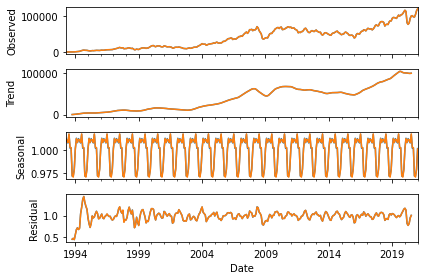

In [ ]:
resultado = seasonal_decompose(preco_medias_1month,  model='multiplicative')
import matplotlib.pyplot as plt
resultado.plot()
pyplot.show()

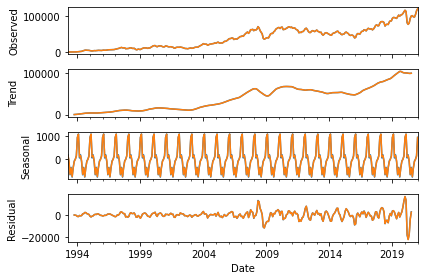

In [ ]:
resultado = seasonal_decompose(preco_medias_1month,  model='additive')
import matplotlib.pyplot as plt
resultado.plot()
pyplot.show()

In [ ]:
dataframe_1month = pd.DataFrame({'ds': dataset_1month.index, 'y': dataset_1month.values})

In [ ]:
#instanciando um modelo aditivo
model = Prophet(seasonality_mode='multiplicative')

In [ ]:
#treinando o modelo
model.fit(dataframe_1month)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Gerando dados futuros
# periods=12 periodos para frente
# Freq= Week, Year, Month
futuro_1month = model.make_future_dataframe(periods = 3, freq='M')

In [ ]:
futuro_1month.head()

,ds
0,1993-04-30
1,1993-05-31
2,1993-06-30
3,1993-07-31
4,1993-08-31


In [ ]:
# prevendo valores para dados futuros gerados
saida_1month = model.predict(futuro_1month)

In [ ]:
# dataset de validação
validation_df_1month = pd.DataFrame({'ds': validation_1month.index})

In [ ]:
# prevendo dados com base nos dados de validação
saida_prediction_1month = model.predict(validation_df_1month)

In [ ]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation_1month.values, saida_prediction_1month.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 10513.030


In [ ]:
preço_medio_open_1month=dataframe_1month.mean()
print(preço_medio_open_1month)

y    39059.537666
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [ ]:
#quantos porcento do valor médio significa esse erro?
percentual_avaliation_1month=(rmse/preço_medio_open_1month)*100

In [ ]:
print('Quantos porcento do valor médio é esse erro : %.3f' % percentual_avaliation_1month)

Quantos porcento do valor médio é esse erro : 26.915


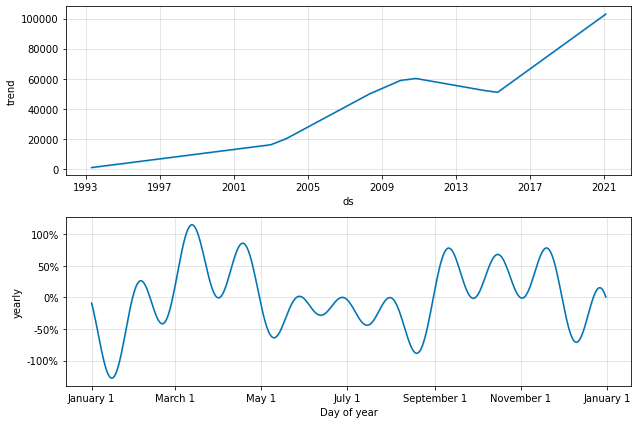

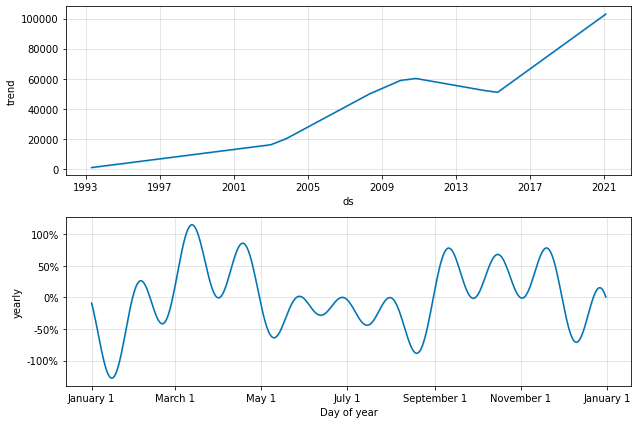

In [ ]:
model.plot_components(saida_1month)

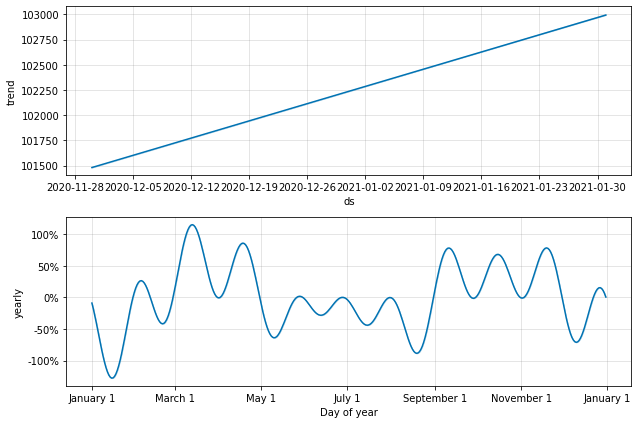

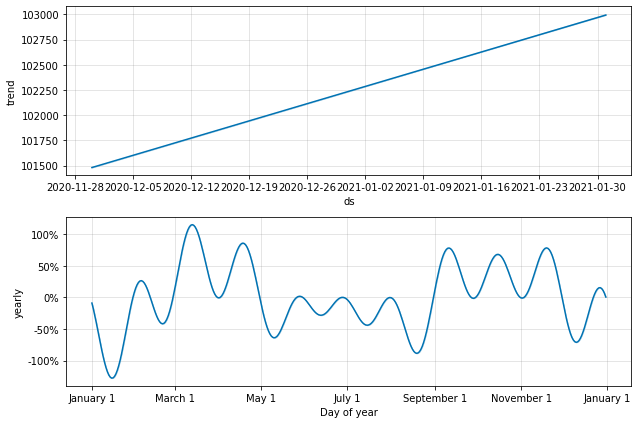

In [ ]:
model.plot_components(saida_prediction_1month)

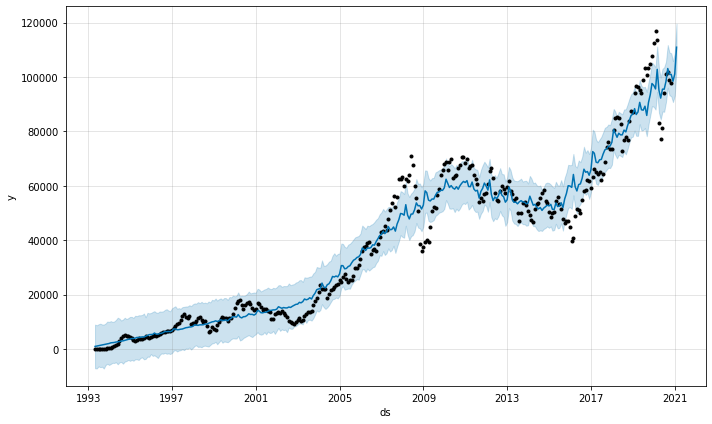

In [ ]:
# Python
figura = model.plot(saida_1month)

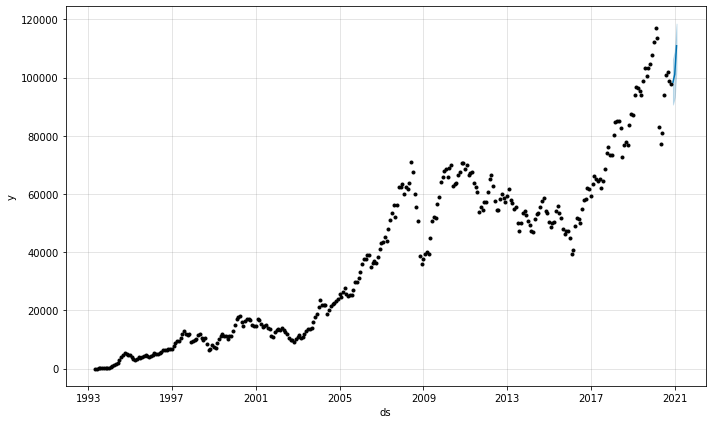

In [ ]:
# Python
figura = model.plot(saida_prediction_1month)